## Objective

In this project, we will study in details the area classification using Foursquare data and ML segmentation and clustering. The aim of this project is to segment areas of Bangalore based on the most common places captured from Foursquare.

Using segmentation and clustering, we hope we can determine:

    1. The similarity or dissimilarirty of both cities - Bangalore and Toronto
    2. Classification of area located inside the city whether it is residential, tourism places, or others
    
## This python file is for clustering and segmenting Bangalore city

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

print("all required libraries are loaded ...")

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [4]:
# The code was removed by Watson Studio for sharing.

,Area,Neighborhoods,Latitude,Longitude,City
0,Central,Cantonment area,12.972442,77.580643,Bangalore
1,Central,Domlur,12.960992,77.638726,Bangalore
2,Central,Indiranagar,12.971891,77.641151,Bangalore
3,Central,Jeevanbheemanagar,12.962900,77.659500,Bangalore
4,Central,Malleswaram,13.003100,77.564300,Bangalore


In [5]:
df = df_data_1

In [6]:
df.shape

(64, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
Area             64 non-null object
Neighborhoods    64 non-null object
Latitude         64 non-null float64
Longitude        64 non-null float64
City             64 non-null object
dtypes: float64(2), object(3)
memory usage: 2.6+ KB


In [8]:
df.head()

,Area,Neighborhoods,Latitude,Longitude,City
0,Central,Cantonment area,12.972442,77.580643,Bangalore
1,Central,Domlur,12.960992,77.638726,Bangalore
2,Central,Indiranagar,12.971891,77.641151,Bangalore
3,Central,Jeevanbheemanagar,12.962900,77.659500,Bangalore
4,Central,Malleswaram,13.003100,77.564300,Bangalore


In [9]:
df["Neighborhoods"].describe()

count                   64
unique                  64
top       Ramamurthy Nagar
freq                     1
Name: Neighborhoods, dtype: object

In [10]:
df["Area"].describe()

count          64
unique          8
top       Central
freq           12
Name: Area, dtype: object

In [13]:
df["Area"].unique()

array(['Central', 'Eastern', 'NorthEastern', 'Northern', 'SouthEastern',
       'Southern', 'SouthernSuburbs', 'Western'], dtype=object)

In [15]:
df1 = df.drop(["Area","City"], axis=1, inplace=False)

In [16]:
df1.head()

,Neighborhoods,Latitude,Longitude
0,Cantonment area,12.972442,77.580643
1,Domlur,12.960992,77.638726
2,Indiranagar,12.971891,77.641151
3,Jeevanbheemanagar,12.962900,77.659500
4,Malleswaram,13.003100,77.564300


In [27]:
# create map of Bangalore using latitude and longitude values
map_blore = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, neighborhood in zip(df1['Latitude'], df1['Longitude'], df1['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_blore)  
    
map_blore

In [28]:
CLIENT_ID = 'ZOGSB1GFQCM0U1AMIQCTKI5HKYM2SVT2Z1I2AZ4HOOGVRNOF'
CLIENT_SECRET = '0DDNQXZNJV0HUXQOZGY33B3TF4TKCUKPL5W5DRSQH5LCT5U1'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZOGSB1GFQCM0U1AMIQCTKI5HKYM2SVT2Z1I2AZ4HOOGVRNOF
CLIENT_SECRET:0DDNQXZNJV0HUXQOZGY33B3TF4TKCUKPL5W5DRSQH5LCT5U1


In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
blore_venues = getNearbyVenues(names=df1['Neighborhoods'],latitudes=df1['Latitude'],longitudes=df1['Longitude'])

Cantonment area
Domlur
Indiranagar
Jeevanbheemanagar
Malleswaram
Pete area
Rajajinagar
Sadashivanagar
Seshadripuram
Shivajinagar
Ulsoor
Vasanth Nagar
Bellandur
CV Raman Nagar
Hoodi
Krishnarajapuram
Mahadevapura
Marathahalli
Varthur
Whitefield
Banaswadi
HBR Layout
Horamavu
Kammanahalli
Lingarajapuram
Ramamurthy Nagar
Hebbal
Jalahalli
Mathikere
Peenya
R. T. Nagar
Vidyaranyapura
Yelahanka
Yeshwanthpur
Bommanahalli
Bommasandra
BTM Layout
Electronic City
HSR Layout
Koramangala
Madiwala
Banashankari
Basavanagudi
Girinagar
J. P. Nagar
Jayanagar
Kumaraswamy Layout
Padmanabhanagar
Uttarahalli
Anjanapura
Arekere
Begur
Gottigere
Hulimavu
Kothnur
Basaveshwaranagar
Kamakshipalya
Kengeri
Mahalakshmi Layout
Nagarbhavi
Nandini Layout
Nayandahalli
Rajarajeshwari Nagar
Vijayanagar


In [37]:
print(blore_venues.shape)
blore_venues.head()

(607, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
4,Cantonment area,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [38]:
blore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arekere,26,26,26,26,26,26
BTM Layout,39,39,39,39,39,39
Banashankari,9,9,9,9,9,9
Banaswadi,7,7,7,7,7,7
Basavanagudi,10,10,10,10,10,10
Basaveshwaranagar,18,18,18,18,18,18
Begur,6,6,6,6,6,6
Bellandur,23,23,23,23,23,23
Bommanahalli,4,4,4,4,4,4


In [39]:
# one hot encoding
blore_onehot = pd.get_dummies(blore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
blore_onehot['Neighborhood'] = blore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [blore_onehot.columns[-1]] + list(blore_onehot.columns[:-1])
blore_onehot = blore_onehot[fixed_columns]

blore_onehot.head()

,Yoga Studio,ATM,Andhra Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bengali Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Chaat Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Coworking Space,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Historic Site,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karnataka Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Mughlai Restaurant,Multiplex,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Optical Shop,Outlet Store,Paintball Field,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pub,Punjabi Restaurant,Rajasthani Restaurant,Resort,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Toll Plaza,Toy / Game Store,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Cantonment area,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
blore_onehot.shape

(607, 130)

In [41]:
blore_grouped = blore_onehot.groupby('Neighborhood').mean().reset_index()
blore_grouped.head()

,Neighborhood,Yoga Studio,ATM,Andhra Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Badminton Court,Bakery,Bar,Basketball Court,Bengali Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Chaat Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Coworking Space,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Furniture / Home Store,Gas Station,Gastropub,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Health & Beauty Service,Historic Site,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Karnataka Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Mughlai Restaurant,Multiplex,Music Venue,Nightclub,North Indian Restaurant,Optical Shop,Outlet Store,Paintball Field,Park,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Pub,Punjabi Restaurant,Rajasthani Restaurant,Resort,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Toll Plaza,Toy / Game Store,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,Arekere,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.000000,0.038462,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.000000,0.0,0.038462,0.0,0.000000,0.0,0.038462,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.115385,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.230769,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.038462,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.153846,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,BTM Layout,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.076923,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.025641,0.0,0.000000,0.0,0.025641,0.0,0.051282,0.0,0.000000,0.0,0.025641,0.0,0.0,0.0,0.0,0.025641,0.0,0.025641,0.025641,0.0,0.0,0.025641,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.179487,0.0,0.025641,0.025641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.025641,0.0,0.000000,0.051282,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.0,0.051282,0.0,0.000000,0.0,0.0,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051282,0.0,0.0
2,Banashankari,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.222222,0.0,0.000000,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.111111,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Banaswadi,0.0,0.0,0.

In [42]:
blore_grouped.shape

(61, 130)

In [43]:
num_top_venues = 5

for hood in blore_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = blore_grouped[blore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arekere----
                 venue  freq
0    Indian Restaurant  0.23
1  Sporting Goods Shop  0.15
2     Department Store  0.12
3                  Bar  0.04
4     Business Service  0.04


----BTM Layout----
                  venue  freq
0     Indian Restaurant  0.18
1  Fast Food Restaurant  0.08
2                Bakery  0.08
3           Snack Place  0.08
4        Ice Cream Shop  0.08


----Banashankari----
                     venue  freq
0                     Café  0.22
1        Indian Restaurant  0.11
2      Sporting Goods Shop  0.11
3  North Indian Restaurant  0.11
4           Clothing Store  0.11


----Banaswadi----
                           venue  freq
0              Indian Restaurant  0.43
1                         Bakery  0.14
2  Vegetarian / Vegan Restaurant  0.14
3                         Market  0.14
4                       Pharmacy  0.14


----Basavanagudi----
                venue  freq
0   Indian Restaurant   0.4
1          Restaurant   0.2
2  Athletics & Sports   0.1

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = blore_grouped['Neighborhood']

for ind in np.arange(blore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Indian Restaurant,Sporting Goods Shop,Department Store,Breakfast Spot,Supermarket,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Bar,Liquor Store
1,BTM Layout,Indian Restaurant,Snack Place,Ice Cream Shop,Fast Food Restaurant,Bakery,Sandwich Place,Chinese Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Diner
2,Banashankari,Café,Shoe Store,North Indian Restaurant,Pizza Place,Indian Restaurant,Clothing Store,Miscellaneous Shop,Sporting Goods Shop,Eastern European Restaurant,Fast Food Restaurant
3,Banaswadi,Indian Restaurant,Market,Bakery,Vegetarian / Vegan Restaurant,Pharmacy,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store
4,Basavanagudi,Indian Restaurant,Restaurant,Mediterranean Restaurant,Hookah Bar,Athletics & Sports,Café,Falafel Restaurant,Flea Market,Fish & Chips Shop,Fast Food Restaurant


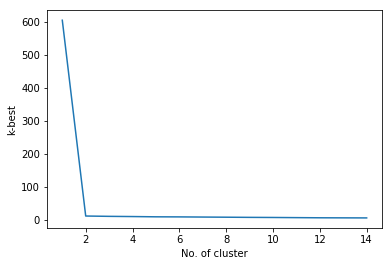

In [48]:
import matplotlib.pyplot as plt
k_best = {}
for k in range(1,15):
    km = KMeans(n_clusters=k,random_state=0)
    km.fit(blore_grouped.drop('Neighborhood',axis=1))
    blore_grouped['Cluster'] = km.labels_
    k_best[k] = km.inertia_

plt.figure()
plt.plot(list(k_best.keys()), list(k_best.values()))
plt.xlabel("No. of cluster")
plt.ylabel("k-best")
plt.show()
print()

In [49]:
# set number of clusters
kclusters = 2

blore_grouped_clustering = blore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(blore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [50]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

blore_merged = df1

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
blore_merged = blore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods')

blore_merged.head()

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cantonment area,12.972442,77.580643,1.0,Indian Restaurant,Bookstore,Seafood Restaurant,Restaurant,Women's Store,Falafel Restaurant,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
1,Domlur,12.960992,77.638726,1.0,Indian Restaurant,Café,Juice Bar,Sandwich Place,Pizza Place,BBQ Joint,Rajasthani Restaurant,Chinese Restaurant,Women's Store,Fast Food Restaurant
2,Indiranagar,12.971891,77.641151,1.0,Café,Pub,Lounge,Ice Cream Shop,Indian Restaurant,Cocktail Bar,Restaurant,Clothing Store,Bakery,Italian Restaurant
3,Jeevanbheemanagar,12.962900,77.659500,0.0,Fast Food Restaurant,Gym,Pizza Place,Donut Shop,Flea Market,Fish & Chips Shop,Falafel Restaurant,Electronics Store,Eastern European Restaurant,Women's Store
4,Malleswaram,13.003100,77.564300,1.0,Ice Cream Shop,Breakfast Spot,Bakery,Indian Restaurant,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant


In [71]:
blore_merged = blore_merged.dropna()
blore_merged["Cluster Labels"] = blore_merged["Cluster Labels"].astype("int32")

(61, 14)

In [77]:
blore_merged.head()

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cantonment area,12.972442,77.580643,1,Indian Restaurant,Bookstore,Seafood Restaurant,Restaurant,Women's Store,Falafel Restaurant,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
1,Domlur,12.960992,77.638726,1,Indian Restaurant,Café,Juice Bar,Sandwich Place,Pizza Place,BBQ Joint,Rajasthani Restaurant,Chinese Restaurant,Women's Store,Fast Food Restaurant
2,Indiranagar,12.971891,77.641151,1,Café,Pub,Lounge,Ice Cream Shop,Indian Restaurant,Cocktail Bar,Restaurant,Clothing Store,Bakery,Italian Restaurant
3,Jeevanbheemanagar,12.962900,77.659500,0,Fast Food Restaurant,Gym,Pizza Place,Donut Shop,Flea Market,Fish & Chips Shop,Falafel Restaurant,Electronics Store,Eastern European Restaurant,Women's Store
4,Malleswaram,13.003100,77.564300,1,Ice Cream Shop,Breakfast Spot,Bakery,Indian Restaurant,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant


In [78]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blore_merged['Latitude'], blore_merged['Longitude'], blore_merged['Neighborhoods'], blore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [79]:
#Cluster 1 for Blore
blore_merged.loc[blore_merged['Cluster Labels'] == 0, blore_merged.columns[[2] + list(range(5, blore_merged.shape[1]))]]

,Longitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,77.6595,Gym,Pizza Place,Donut Shop,Flea Market,Fish & Chips Shop,Falafel Restaurant,Electronics Store,Eastern European Restaurant,Women's Store
5,77.5758,Historic Site,Women's Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Electronics Store
15,77.6878,Women's Store,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Electronics Store
18,77.7412,Women's Store,Electronics Store,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant,Eastern European Restaurant,Food Court
24,77.6306,Restaurant,Women's Store,Eastern European Restaurant,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Donut Shop
31,77.5561,Bus Station,Food Court,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Electronics Store
57,77.4827,Optical Shop,Indian Restaurant,Italian Restaurant,Electronics Store,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant
60,77.5338,ATM,Women's Store,Electronics Store,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant,Donut Shop


In [80]:
#Cluster 2 for Blore
blore_merged.loc[blore_merged['Cluster Labels'] == 1, blore_merged.columns[[2] + list(range(5, blore_merged.shape[1]))]]

,Longitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,77.580643,Bookstore,Seafood Restaurant,Restaurant,Women's Store,Falafel Restaurant,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
1,77.638726,Café,Juice Bar,Sandwich Place,Pizza Place,BBQ Joint,Rajasthani Restaurant,Chinese Restaurant,Women's Store,Fast Food Restaurant
2,77.641151,Pub,Lounge,Ice Cream Shop,Indian Restaurant,Cocktail Bar,Restaurant,Clothing Store,Bakery,Italian Restaurant
4,77.564300,Breakfast Spot,Bakery,Indian Restaurant,Food & Drink Shop,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant
6,77.552500,Vegetarian / Vegan Restaurant,Snack Place,Chaat Place,Park,Indian Restaurant,Café,Women's Store,Fish & Chips Shop,Fast Food Restaurant
7,77.581300,Coffee Shop,Indian Restaurant,Ice Cream Shop,Café,Women's Store,Cafeteria,Plaza,Chinese Restaurant,Spa
8,77.578700,Asian Restaurant,Chinese Restaurant,Chaat Place,Food & Drink Shop,Lounge,Indian Restaurant,Health & Beauty Service,Flea Market,Dessert Shop
9,77.605700,Clothing Store,Tea Room,Donut Shop,South Indian Restaurant,Fast Food Restaurant,Market,Diner,Dim Sum Restaurant,Flower Shop
10,77.628600,Burger Joint,Bakery,Women's Store,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant,Food Court
11,77.592000,Coffee Shop,Chinese Restaurant,Hotel,Italian Restaurant,Steakhouse,Pizza Place,Pub,Fast Food Restaurant,Sandwich Place
